In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import LinearSVC, NuSVC, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neural_network import MLPClassifier

In [2]:
TEST_PROPORTION_SIZE=0.2
CORRELATION_TARGET=0.75

In [3]:
dataset = pd.read_csv('../dataset.csv')
dataset.shape

(569, 32)

In [4]:
dataset.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
564,911320502,B,13.17,18.22,84.28,537.3,0.07466,0.05994,0.04859,0.02870,...,14.90,23.89,95.10,687.6,0.1282,0.1965,0.18760,0.10450,0.2235,0.06925
565,898677,B,10.26,14.71,66.20,321.6,0.09882,0.09159,0.03581,0.02037,...,10.88,19.48,70.89,357.1,0.1360,0.1636,0.07162,0.04074,0.2434,0.08488
566,873885,M,15.28,22.41,98.92,710.6,0.09057,0.10520,0.05375,0.03263,...,17.80,28.03,113.80,973.1,0.1301,0.3299,0.36300,0.12260,0.3175,0.09772
567,911201,B,14.53,13.98,93.86,644.2,0.10990,0.09242,0.06895,0.06495,...,15.80,16.93,103.10,749.9,0.1347,0.1478,0.13730,0.10690,0.2606,0.07810
568,9012795,M,21.37,15.10,141.30,1386.0,0.10010,0.15150,0.19320,0.12550,...,22.69,21.84,152.10,1535.0,0.1192,0.2840,0.40240,0.19660,0.2730,0.08666


# EDA

In [5]:
dataset.shape

(569, 32)

In [6]:
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,8910251,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,905520,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,868871,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,9012568,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [7]:
dataset.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
564,911320502,B,13.17,18.22,84.28,537.3,0.07466,0.05994,0.04859,0.02870,...,14.90,23.89,95.10,687.6,0.1282,0.1965,0.18760,0.10450,0.2235,0.06925
565,898677,B,10.26,14.71,66.20,321.6,0.09882,0.09159,0.03581,0.02037,...,10.88,19.48,70.89,357.1,0.1360,0.1636,0.07162,0.04074,0.2434,0.08488
566,873885,M,15.28,22.41,98.92,710.6,0.09057,0.10520,0.05375,0.03263,...,17.80,28.03,113.80,973.1,0.1301,0.3299,0.36300,0.12260,0.3175,0.09772
567,911201,B,14.53,13.98,93.86,644.2,0.10990,0.09242,0.06895,0.06495,...,15.80,16.93,103.10,749.9,0.1347,0.1478,0.13730,0.10690,0.2606,0.07810
568,9012795,M,21.37,15.10,141.30,1386.0,0.10010,0.15150,0.19320,0.12550,...,22.69,21.84,152.10,1535.0,0.1192,0.2840,0.40240,0.19660,0.2730,0.08666


Check the types parsed from the input file

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 569 non-null    int64  
 1   diagnosis          569 non-null    object 
 2   radius_mean        569 non-null    float64
 3   texture_mean       569 non-null    float64
 4   perimeter_mean     569 non-null    float64
 5   area_mean          569 non-null    float64
 6   smoothness_mean    569 non-null    float64
 7   compactness_mean   569 non-null    float64
 8   concavity_mean     569 non-null    float64
 9   points_mean        569 non-null    float64
 10  symmetry_mean      569 non-null    float64
 11  dimension_mean     569 non-null    float64
 12  radius_se          569 non-null    float64
 13  texture_se         569 non-null    float64
 14  perimeter_se       569 non-null    float64
 15  area_se            569 non-null    float64
 16  smoothness_se      569 non

Only ID and Diagnosis fields have been found not to be of type float. ID is found to be of type integer and diagnosis is found to be of type object.

Further investigating the "Diagnosis" field as this contains the important information which is the output label.

In [9]:
dataset['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

<AxesSubplot:>

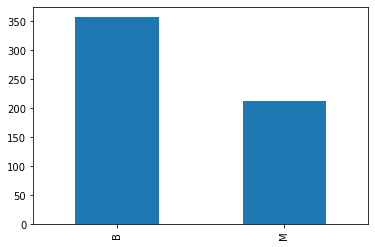

In [10]:
dataset['diagnosis'].value_counts().plot(kind='bar')

While not exactly balanced, the count of the two possible output labels are similar enough that bias is minimized.

## Checking for empty / null values

In [11]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


In [12]:
dataset.isnull().sum()

id                   0
diagnosis            0
radius_mean          0
texture_mean         0
perimeter_mean       0
area_mean            0
smoothness_mean      0
compactness_mean     0
concavity_mean       0
points_mean          0
symmetry_mean        0
dimension_mean       0
radius_se            0
texture_se           0
perimeter_se         0
area_se              0
smoothness_se        0
compactness_se       0
concavity_se         0
points_se            0
symmetry_se          0
dimension_se         0
radius_worst         0
texture_worst        0
perimeter_worst      0
area_worst           0
smoothness_worst     0
compactness_worst    0
concavity_worst      0
points_worst         0
symmetry_worst       0
dimension_worst      0
dtype: int64

All the float columns have 569 values which is the same as the number of records. Checking for nulls also show 0 null values. This means that all float fields are populated.

## Label Pre-Processing

The ID column is a unique identifier and does not work as a feature. If left as a feature, the machine learning algorithm may interpret it as a numerical field and perform calculations on it. Use it as an index and drop it as a column.

In [13]:
dataset.index = dataset['id']
dataset.drop('id', axis=1, inplace=True)
dataset.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
87139402,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,0.1959,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
8910251,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,0.1922,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
905520,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,0.1714,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
868871,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,0.1771,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
9012568,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,0.1721,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


Encode the labels (outputs) as numerical values

In [14]:
label_encoder = LabelEncoder()
label_encoder.fit(['B', 'M'])
labels = label_encoder.transform(dataset['diagnosis'])

In [15]:
pd.DataFrame(labels).tail()

,0
564,0
565,0
566,1
567,0
568,1


In [16]:
dataset.drop('diagnosis', axis=1, inplace=True)
dataset['diagnosis_is_malignant'] = labels

In [17]:
dataset.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst,diagnosis_is_malignant
id,,,,,,,,,,,,,,,,,,,,,
87139402,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,0.1959,0.05955,...,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771,0
8910251,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,0.1922,0.06491,...,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587,0
905520,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,0.1714,0.06340,...,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881,0
868871,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,0.1771,0.06072,...,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784,0
9012568,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,0.1721,0.05544,...,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766,0


## Check for Correlations

Text(0.5, 1.0, 'Feature Correlations')

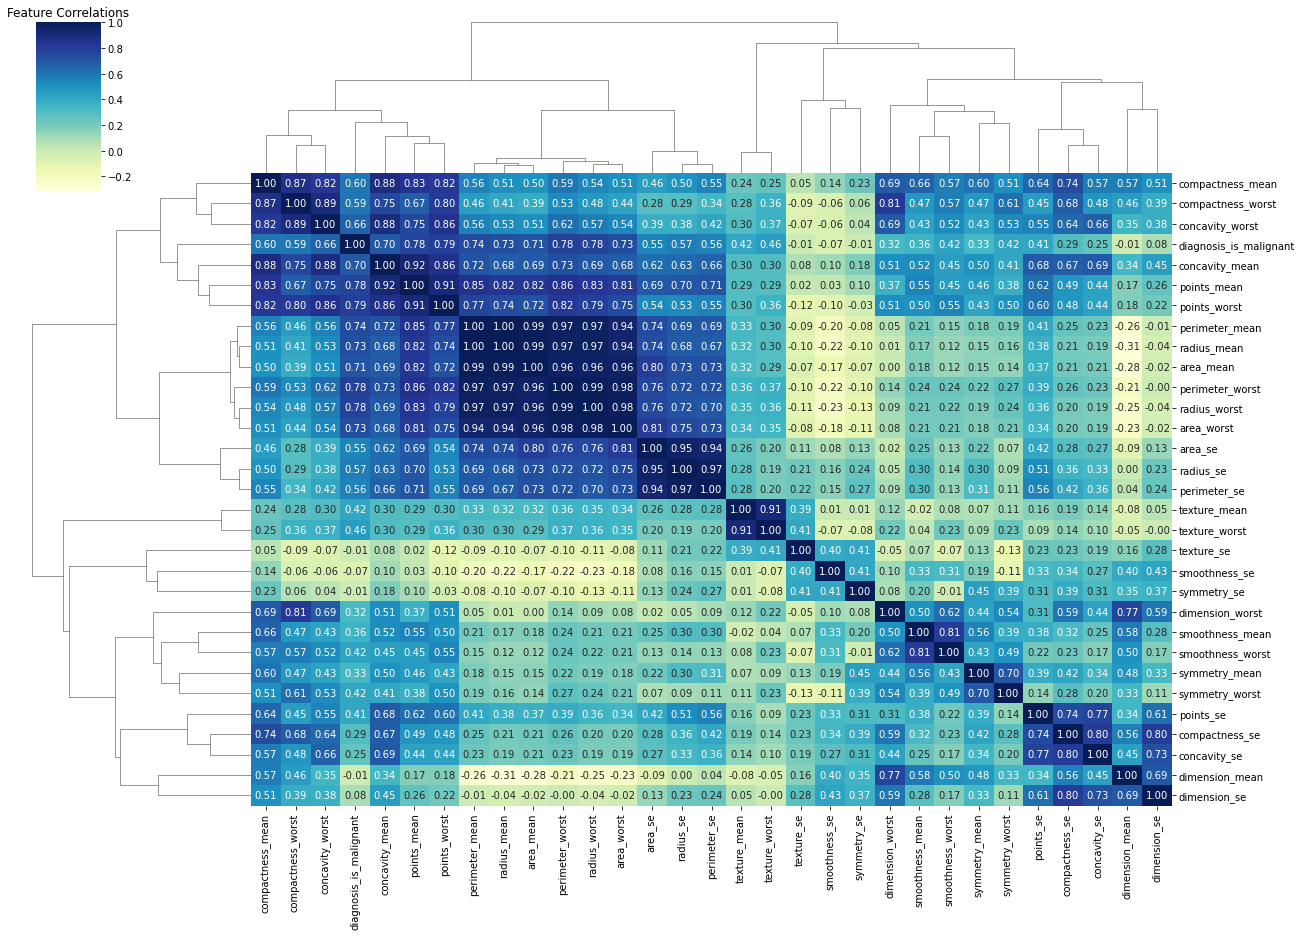

In [18]:
corr = dataset.corr()
sns.clustermap(corr, annot=True, fmt = '.2f',figsize=(18,13),cmap='YlGnBu') #fmt noktadan sonra 2 sayi görmek icin
plt.title('Feature Correlations')

Text(0.5, 1.0, "Target's correlations greater than 0.75")

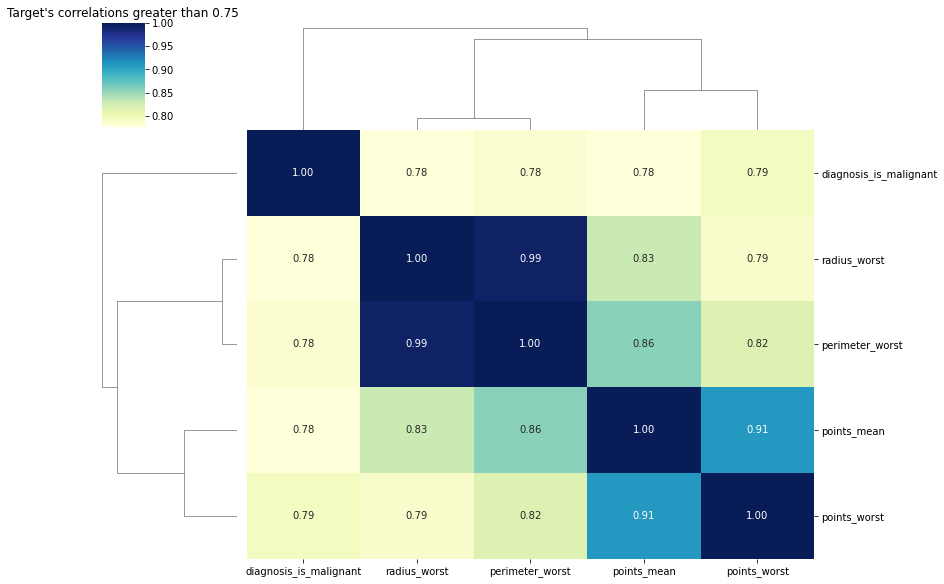

In [19]:
filt = np.abs(corr['diagnosis_is_malignant']) > CORRELATION_TARGET
corr_features = corr.columns[filt].tolist()
sns.clustermap(dataset[corr_features].corr(),annot=True, fmt = '.2f',figsize=(12,8),cmap='YlGnBu')
plt.title("Target's correlations greater than {}".format(CORRELATION_TARGET))

Looking at correlations against diagnosis, the features "radius_worst", "perimeter_worst", "points_mean", and "points_worst" represent the features that are correlated to malignant diagnosis.

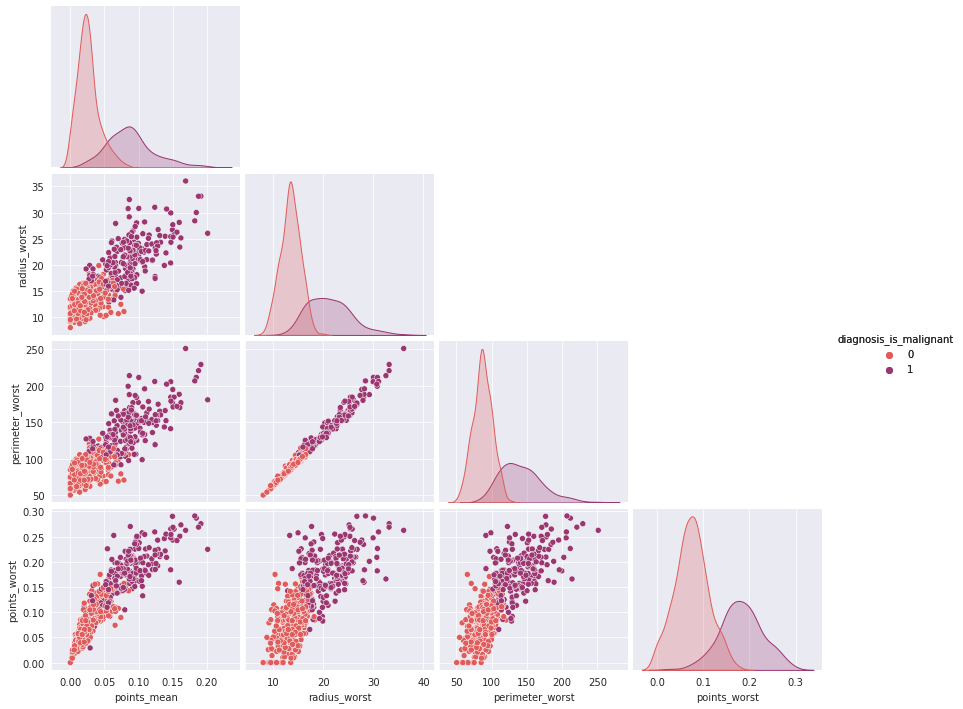

In [20]:
sns.set_style("darkgrid")
fig = sns.pairplot(data=dataset[corr_features], hue='diagnosis_is_malignant', kind='scatter', diag_kind='kde', palette='flare', corner=True)
fig.add_legend()

fig.tight_layout()
plt.show()

The charts above further show the correlation of the identified features with the corresponding diagnosis of malignant or benign. As seen, the groups of values representing malignant tumors can be found close to each other. This is same with benign tumors.

## Outlier Management

Generate box plots to have a quick view of features for outliers.

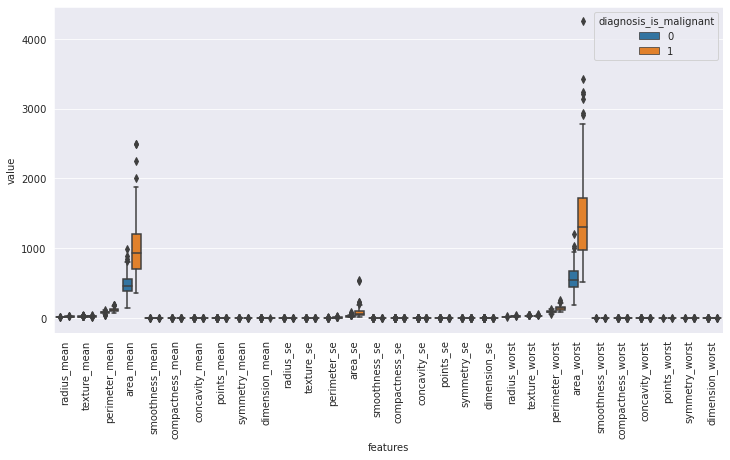

In [21]:
# box plot 
data_melted = pd.melt(dataset, id_vars = "diagnosis_is_malignant",
                      var_name = "features",
                      value_name = "value")

plt.figure(figsize=(12,6))
sns.boxplot(x = "features", y = "value", hue = "diagnosis_is_malignant", data = data_melted)
plt.xticks(rotation = 90)
plt.show()

From the plot, the features that need to be investigated for outliers are "area_mean", "area_se" and "area_worst".

<AxesSubplot:>

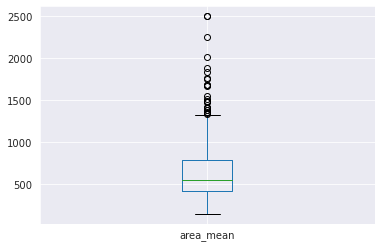

In [22]:
dataset.boxplot(column=['area_mean'])

The top 2 or 3 measurements can be considered as outliers for the area_mean feature.

<AxesSubplot:>

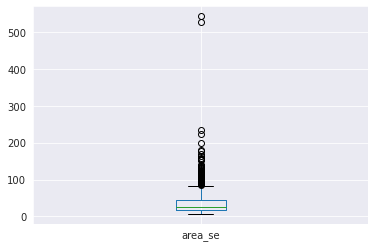

In [23]:
dataset.boxplot(column=['area_se'])

The two measurements at the far top are obvious outliers in the area_se feature.*italicized text*

<AxesSubplot:>

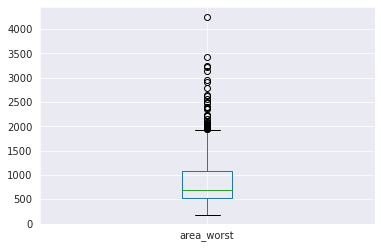

In [24]:
dataset.boxplot(column=['area_worst'])

The top measurement can be considered as outlier for the area_worst feature.

Based on visual inspection of the plots, there are 5 points that may be considered as outliers. This represents approximately 1% of the 569 records.

Use Scikit-Learn's Isolation Forest to determine outliers. Isolation forest identifies outliers as those that are far away from the feature space and few in number. Instead of 1%, use 2% for outliers percentage as some outliers may have been missed from earlier inspection.

In [25]:
# Prepare dataset for outlier filtering
X = dataset[dataset.columns[:-1]]
y = dataset['diagnosis_is_malignant']

In [26]:
iso_forest = IsolationForest(contamination=0.02)
outlier_predictions = iso_forest.fit_predict(X)
print('outlier_predictions values and counts: ',np.unique(outlier_predictions,return_counts=True))

/opt/conda/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


outlier_predictions values and counts:  (array([-1,  1]), array([ 12, 557]))


In [27]:
outliers = pd.DataFrame()
outliers["values"] = outlier_predictions
outliers["values"]

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    1
Name: values, Length: 569, dtype: int64

In [28]:
filter = outliers["values"] == -1
outlier_indices = outliers[filter].index.tolist()
outlier_indices

[42, 47, 58, 94, 271, 275, 337, 420, 460, 487, 544, 552]

In [29]:
original_index = X.index
X.reset_index(drop=True, inplace=True)
y.reset_index(drop=True, inplace=True)

In [30]:
X = X.drop(outlier_indices)
y = y.drop(outlier_indices).values
print('New X shape: ', X.shape)
print('New y shape: ', y.shape)

New X shape:  (557, 30)
New y shape:  (557,)


# Machine Learning

## Train and Test Preparation

Separate the labels from the features

In [31]:
X = dataset[dataset.columns[:-1]]
y = dataset['diagnosis_is_malignant']

In [32]:
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
87139402,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,0.1959,0.05955,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
8910251,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,0.1922,0.06491,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
905520,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,0.1714,0.06340,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
868871,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,0.1771,0.06072,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
9012568,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,0.1721,0.05544,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [33]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: diagnosis_is_malignant, dtype: int64

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_PROPORTION_SIZE)

In [35]:
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

X_train shape: (455, 30)
X_test shape: (114, 30)
y_train shape: (455,)
y_test shape: (114,)


## Scaling

A lot of machine learning algorithms perform better when the input have been scaled to a consistent range. Because of this, both train and test will be passed through a scaler prior to further processing.

In [36]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) 
X_test = scaler.transform(X_test) 

Show box plot of new scaled training dataset

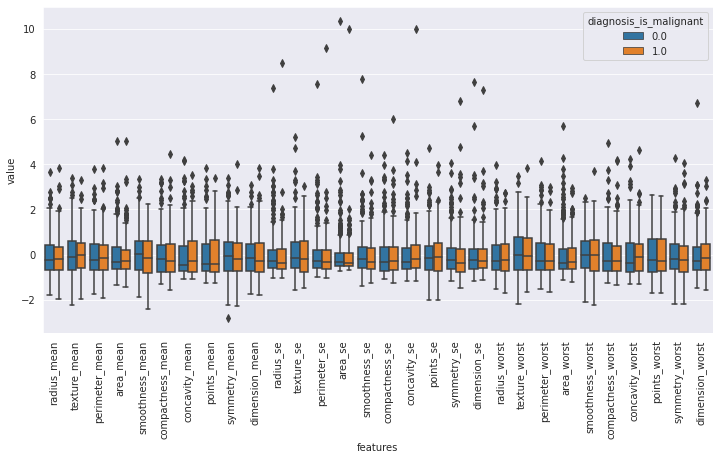

In [37]:
X_train_df = pd.DataFrame(X_train, columns = X.columns)
X_train_df["diagnosis_is_malignant"] = y_train

data_melted = pd.melt(X_train_df, id_vars = "diagnosis_is_malignant",
                      var_name = "features",
                      value_name = "value")

plt.figure(figsize=(12,6))
sns.boxplot(x = "features", y = "value", hue = "diagnosis_is_malignant", data = data_melted)
plt.xticks(rotation = 90)
plt.show()

## Classification / Predictions

In [38]:
results = {}

### K-Nearest Neighbors Classifier

In [39]:
algo_name = 'K Nearest Neighbors'

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_test = knn.predict(X_test)
y_pred_train = knn.predict(X_train)
cm = confusion_matrix(y_test, y_pred_test)
acc_test = accuracy_score(y_test, y_pred_test)
acc_train = accuracy_score(y_train, y_pred_train)
score = knn.score(X_test, y_test)

print("Accuracy (Testset):", acc_test)
print("Accuracy (Trainset):", acc_train)
print("Confusion Matrix:")
print(cm)

results[algo_name] = acc_test

Accuracy (Testset): 0.9649122807017544
Accuracy (Trainset): 0.9736263736263736
Confusion Matrix:
[[73  1]
 [ 3 37]]


### Decision Trees

In [40]:
algo_name = 'Decision Trees'

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred_test = dtc.predict(X_test)
y_pred_train = dtc.predict(X_train)
cm = confusion_matrix(y_test, y_pred_test)
acc_test = accuracy_score(y_test, y_pred_test)
acc_train = accuracy_score(y_train, y_pred_train)
score = dtc.score(X_test, y_test)

print("Accuracy (Testset):", acc_test)
print("Accuracy (Trainset):", acc_train)
print("Confusion Matrix:")
print(cm)

results[algo_name] = acc_test

Accuracy (Testset): 0.9035087719298246
Accuracy (Trainset): 1.0
Confusion Matrix:
[[67  7]
 [ 4 36]]


### Random Forest

In [41]:
algo_name = 'Random Forest'

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred_test = rfc.predict(X_test)
y_pred_train = rfc.predict(X_train)
cm = confusion_matrix(y_test, y_pred_test)
acc_test = accuracy_score(y_test, y_pred_test)
acc_train = accuracy_score(y_train, y_pred_train)
score = rfc.score(X_test, y_test)

print("Accuracy (Testset):", acc_test)
print("Accuracy (Trainset):", acc_train)
print("Confusion Matrix:")
print(cm)

results[algo_name] = acc_test

Accuracy (Testset): 0.9649122807017544
Accuracy (Trainset): 1.0
Confusion Matrix:
[[72  2]
 [ 2 38]]


### ADA Boost

In [42]:
algo_name = 'ADA Boost'

ada = AdaBoostClassifier()
ada.fit(X_train, y_train)
y_pred_test = ada.predict(X_test)
y_pred_train = ada.predict(X_train)
cm = confusion_matrix(y_test, y_pred_test)
acc_test = accuracy_score(y_test, y_pred_test)
acc_train = accuracy_score(y_train, y_pred_train)
score = ada.score(X_test, y_test)

print("Accuracy (Testset):", acc_test)
print("Accuracy (Trainset):", acc_train)
print("Confusion Matrix:")
print(cm)

results[algo_name] = acc_test

Accuracy (Testset): 0.956140350877193
Accuracy (Trainset): 1.0
Confusion Matrix:
[[70  4]
 [ 1 39]]


### Linear Support Vector Classification

In [43]:
algo_name = 'Linear Support Vector'

lsvc = LinearSVC()
lsvc.fit(X_train, y_train)
y_pred_test = lsvc.predict(X_test)
y_pred_train = lsvc.predict(X_train)
cm = confusion_matrix(y_test, y_pred_test)
acc_test = accuracy_score(y_test, y_pred_test)
acc_train = accuracy_score(y_train, y_pred_train)
score = lsvc.score(X_test, y_test)

print("Accuracy (Testset):", acc_test)
print("Accuracy (Trainset):", acc_train)
print("Confusion Matrix:")
print(cm)

results[algo_name] = acc_test

Accuracy (Testset): 0.956140350877193
Accuracy (Trainset): 0.9934065934065934
Confusion Matrix:
[[73  1]
 [ 4 36]]


### Nu-Support Vector Classification

In [44]:
algo_name = 'Nu-Support Vector'

nsvc = NuSVC()
nsvc.fit(X_train, y_train)
y_pred_test = nsvc.predict(X_test)
y_pred_train = nsvc.predict(X_train)
cm = confusion_matrix(y_test, y_pred_test)
acc_test = accuracy_score(y_test, y_pred_test)
acc_train = accuracy_score(y_train, y_pred_train)
score = nsvc.score(X_test, y_test)

print("Accuracy (Testset):", acc_test)
print("Accuracy (Trainset):", acc_train)
print("Confusion Matrix:")
print(cm)

results[algo_name] = acc_test

Accuracy (Testset): 0.9298245614035088
Accuracy (Trainset): 0.9516483516483516
Confusion Matrix:
[[72  2]
 [ 6 34]]


### Support Vector Classification

In [45]:
algo_name = 'Support Vector'

svc = SVC()
svc.fit(X_train, y_train)
y_pred_test = svc.predict(X_test)
y_pred_train = svc.predict(X_train)
cm = confusion_matrix(y_test, y_pred_test)
acc_test = accuracy_score(y_test, y_pred_test)
acc_train = accuracy_score(y_train, y_pred_train)
score = svc.score(X_test, y_test)

print("Accuracy (Testset):", acc_test)
print("Accuracy (Trainset):", acc_train)
print("Confusion Matrix:")
print(cm)

results[algo_name] = acc_test

Accuracy (Testset): 0.9473684210526315
Accuracy (Trainset): 0.989010989010989
Confusion Matrix:
[[71  3]
 [ 3 37]]


### Gaussian Naive Bayes

In [46]:
algo_name = 'Gaussian Naive Bayes'

gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_test = gnb.predict(X_test)
y_pred_train = gnb.predict(X_train)
cm = confusion_matrix(y_test, y_pred_test)
acc_test = accuracy_score(y_test, y_pred_test)
acc_train = accuracy_score(y_train, y_pred_train)
score = gnb.score(X_test, y_test)

print("Accuracy (Testset):", acc_test)
print("Accuracy (Trainset):", acc_train)
print("Confusion Matrix:")
print(cm)

results[algo_name] = acc_test

Accuracy (Testset): 0.956140350877193
Accuracy (Trainset): 0.9340659340659341
Confusion Matrix:
[[73  1]
 [ 4 36]]


### Gaussian Process

In [47]:
algo_name = 'Gaussian Process'

gpc = GaussianProcessClassifier()
gpc.fit(X_train, y_train)
y_pred_test = gpc.predict(X_test)
y_pred_train = gpc.predict(X_train)
cm = confusion_matrix(y_test, y_pred_test)
acc_test = accuracy_score(y_test, y_pred_test)
acc_train = accuracy_score(y_train, y_pred_train)
score = gpc.score(X_test, y_test)

print("Accuracy (Testset):", acc_test)
print("Accuracy (Trainset):", acc_train)
print("Confusion Matrix:")
print(cm)

results[algo_name] = acc_test

Accuracy (Testset): 0.956140350877193
Accuracy (Trainset): 0.9956043956043956
Confusion Matrix:
[[72  2]
 [ 3 37]]


### Neural Network

In [48]:
algo_name = 'Neural Network'

mlpc = MLPClassifier()
mlpc.fit(X_train, y_train)
y_pred_test = mlpc.predict(X_test)
y_pred_train = mlpc.predict(X_train)
cm = confusion_matrix(y_test, y_pred_test)
acc_test = accuracy_score(y_test, y_pred_test)
acc_train = accuracy_score(y_train, y_pred_train)
score = mlpc.score(X_test, y_test)

print("Accuracy (Testset):", acc_test)
print("Accuracy (Trainset):", acc_train)
print("Confusion Matrix:")
print(cm)

results[algo_name] = acc_test

Accuracy (Testset): 0.9649122807017544
Accuracy (Trainset): 0.9934065934065934
Confusion Matrix:
[[72  2]
 [ 2 38]]


/opt/conda/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


# Conclusion

In [49]:
results_df = pd.DataFrame.from_dict(results, orient='index', columns=['Accuracy'])

In [50]:
results_df.sort_values(by=['Accuracy'], axis=0, ascending=False)

,Accuracy
K Nearest Neighbors,0.964912
Random Forest,0.964912
Neural Network,0.964912
ADA Boost,0.956140
Linear Support Vector,0.956140
Gaussian Naive Bayes,0.956140
Gaussian Process,0.956140
Support Vector,0.947368
Nu-Support Vector,0.929825
Decision Trees,0.903509


Multiple machine learning algorithms are viable options for predicting malignant tumors using this dataset. There are multiple options that provide more than 98% accuracy with the default hyper-parameters. 

Initial results show that K Nearest Neighbors, Gaussian Process, and Support Vector are very likely candidates. On the opposite end, Decision Trees does not perform well with this datase.

These results can be further improved by tuning the algorithms.